# Importing Packages & Processing Data

Import the required packages:

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sb

Get the raw data from the .csv file and process it. The processing involves getting rid of vague or unhelpful columns, and adding a column for the word count in a song's lyrics, which will help us down the road:

In [22]:
raw_data = pd.read_csv("tcc_ceds_music.csv")

# process data by removing and adding columns
processed_data = raw_data.drop(columns=['instrumentalness', 'like/girls', 'acousticness'])

# define function to count words in lyrics column


def lyrics_word_count(song_row):
    lyrics = ' '.join(song_row['lyrics'])
    words = lyrics.split()
    return len(words)


processed_data['word_count'] = 0
for index, row in processed_data.iterrows():
    processed_data.at[index, 'word_count'] = lyrics_word_count(row)

processed_data.to_csv('processed_data.csv', index=False)


# Functions & Plotting

Get data about songs released each year:

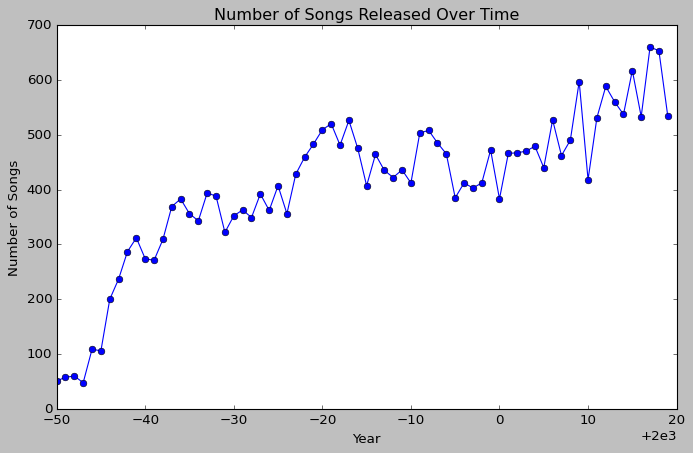

In [23]:
def amount_of_songs_by_year(dataframe, year):
    counter = 0
    for index, row in dataframe.iterrows():
        if row['release_date'] == year:
            counter += 1
    return counter

def plot_songs_by_year(dataframe):
    unique_years = dataframe['release_date'].unique()
    year_data = {'Year': unique_years, 'Number_of_Songs': [amount_of_songs_by_year(dataframe, year) for year in unique_years]}
    songs_by_year_df = pd.DataFrame(year_data)
    plt.figure(figsize=(10, 6))
    plt.plot(songs_by_year_df['Year'], songs_by_year_df['Number_of_Songs'], marker='o', linestyle='-')
    plt.title('Number of Songs Released Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Songs')
    plt.show()

plot_songs_by_year(processed_data)

*We get an increasing number of songs released in a given year over time, as was our initial expectation.*

Get data on average song lengths over time:

In [ ]:
def song_length_average_by_year(dataframe, year):
    sum_of_times = 0
    songs_in_year = amount_of_songs_by_year(dataframe, year)
    for index, row in dataframe.iterrows():
        if row['release_date'] == year:
            sum_of_times += row['len']
    average = sum_of_times / songs_in_year
    return average


def plot_song_length_average_by_year(dataframe):
    unique_years = dataframe['release_date'].unique()
    year_data = {'Year': unique_years, 'Song Length Average': [song_length_average_by_year(dataframe, year) for year in unique_years]}
    averages_by_year_df = pd.DataFrame(year_data)
    plt.figure(figsize=(10, 6))
    plt.plot(averages_by_year_df['Year'], averages_by_year_df['Song Length Average'], marker='o', linestyle='-')
    plt.title('Song Length Average Over Time')
    plt.xlabel('Year')
    plt.ylabel('Length')
    plt.show()

plot_song_length_average_by_year(processed_data)

*We can see a clear upwards trend in song length over time, which was not our initial expectation.*

Get data on the prevalence of a given emotion in a genre:

In [ ]:
def amount_of_songs_in_genre(dataframe, genre):
    counter = 0
    for index, row in dataframe.iterrows():
        if row['genre'] == genre:
            counter += 1
    return counter


def average_emotion_by_genre(dataframe, genre, emotion):
    emotion_sum = 0
    songs_in_genre = amount_of_songs_in_genre(dataframe, genre)
    for index, row in dataframe.iterrows():
        if row['genre'] == genre:
            emotion_sum += row[emotion]
    average = emotion_sum / songs_in_genre
    return average


def plot_emotion_by_genre(dataframe, emotion):
    unique_genres = dataframe['genre'].unique()
    emotion_data = {'Genre': unique_genres, f'Emotion Average For {emotion}': [average_emotion_by_genre(dataframe, genre, emotion) for genre in unique_genres]}
    emotion_averages_df = pd.DataFrame(emotion_data)
    plt.figure(figsize=(10, 6))
    plt.plot(emotion_averages_df['Genre'], emotion_averages_df[f'Emotion Average For {emotion}'], marker='o', linestyle='-')
    plt.title(f'Emotion Averages For {emotion} By Genres')
    plt.xlabel('Genre')
    plt.ylabel('Average')
    plt.show()

# Use the plot_emotion_by_genre() function on one of these emotions: 'dating', 'violence', 'world/life', 'night/time',
#  'shake the audience', 'family/gospel', 'romantic', 'communication',
#  'obscene', 'music', 'movement/places', 'light/visual perceptions',
#  'family/spiritual', 'sadness', 'feelings', 'danceability', 'loudness',
#  'valence', 'energy'
# Example:
plot_emotion_by_genre(processed_data, 'obscene')

*We see that the most obscene genre is hip hop, as is expected.*

Get the amount of unique artists in a genre:

In [ ]:
def find_amount_of_unique_artists_in_genre(dataframe, genre):
    artist_group = set()
    for index, row in dataframe.iterrows():
        if row['genre'] == genre:
            if row['artist_name'] not in artist_group:
                artist_group.add(row['artist_name'])
    return len(artist_group)

print(find_amount_of_unique_artists_in_genre(processed_data, 'rock'))
print(find_amount_of_unique_artists_in_genre(processed_data, 'hip hop'))
print(find_amount_of_unique_artists_in_genre(processed_data, 'pop'))

Get the amount of songs released by a given artist:

In [ ]:
def count_songs_by_artist(dataframe, artist):
    count = 0
    for index, row in dataframe.iterrows():
        if row['artist_name'] == artist:
            count += 1
    return count

print(count_songs_by_artist(processed_data, 'les paul'))

Get the period of an artist's career, i.e their years active:

In [ ]:
def artist_active_years(dataframe, artist):
    artist_years = set()
    for index, row in dataframe.iterrows():
        if row['artist_name'] == artist:
            if row['release_date'] not in artist_years:
                artist_years.add(row['release_date'])

    if len(artist_years) == 0:
        return []
    first_year = min(artist_years)
    last_year = max(artist_years)
    if first_year == last_year:
        return [first_year]
    return [first_year, last_year]

print(artist_active_years(processed_data, 'les paul'))

Get data on the amount of genres in which songs were released throughout the years:

In [ ]:
def genres_per_year(dataframe):
    genres_per_year_dict = {}
    for year in dataframe['release_date'].unique():
        year_data = dataframe[dataframe['release_date'] == year]
        unique_genres = set(year_data['genre'])
        genres_per_year_dict[year] = len(unique_genres)
    return genres_per_year_dict


def plot_genres_over_years(dataframe):
    genres_dict = genres_per_year(dataframe)
    years = list(genres_dict.keys())
    genre_counts = list(genres_dict.values())
    y_min = min(genre_counts)
    y_max = max(genre_counts)
    plt.figure(figsize=(10, 6))
    plt.plot(years, genre_counts, marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel('Number of Genres')
    plt.title('Number of Music Genres Released per Year')
    plt.ylim(y_min - 3, y_max + 3)
    plt.show()

plot_genres_over_years(processed_data)

*We can see that as time goes by there are songs released in more genres of music, as is expected since new genres are created over time, while old genres remain relevant.*

Get data on the average amount of words per song over the years:

In [ ]:
def lyrics_average_by_year(dataframe, year):
    sum_of_counts = 0
    songs_in_year = amount_of_songs_by_year(dataframe, year)
    for index, row in dataframe.iterrows():
        if row['release_date'] == year:
            sum_of_counts += row['word_count']
    average = sum_of_counts / songs_in_year
    return average


def plot_song_lyrics_average_by_year(dataframe):
    unique_years = dataframe['release_date'].unique()
    year_data = {'Year': unique_years, 'Word Count Average': [lyrics_average_by_year(dataframe, year) for year in unique_years]}
    averages_by_year_df = pd.DataFrame(year_data)
    plt.figure(figsize=(10, 6))
    plt.plot(averages_by_year_df['Year'], averages_by_year_df['Word Count Average'], marker='o', linestyle='-')
    plt.title('Song Lyrics Over Years')
    plt.xlabel('Year')
    plt.ylabel('Word Count')
    plt.show()

plot_song_lyrics_average_by_year(processed_data)

*We see that the average amount of words per song goes up over time, perhaps due to the rise of more lyric-heavy genres such as hip hop.*

Get data on the average word count in a song's lyrics per genre:

In [ ]:
def lyrics_average_by_genre(dataframe, genre):
    sum_of_counts = 0
    songs_in_genre = amount_of_songs_in_genre(dataframe, genre)
    for index, row in dataframe.iterrows():
        if row['genre'] == genre:
            sum_of_counts += row['word_count']
    average = sum_of_counts / songs_in_genre
    return average


def plot_song_lyrics_average_by_genre(dataframe):
    unique_genres = dataframe['genre'].unique()
    year_data = {'Genre': unique_genres, 'Word Count Average': [lyrics_average_by_genre(dataframe, genre) for genre in unique_genres]}
    averages_by_year_df = pd.DataFrame(year_data)
    plt.figure(figsize=(10, 6))
    plt.plot(averages_by_year_df['Genre'], averages_by_year_df['Word Count Average'], marker='o', linestyle='-')
    plt.title('Song Lyrics Average By Genre')
    plt.xlabel('Genre')
    plt.ylabel('Word Count')
    plt.show()

plot_song_lyrics_average_by_genre(processed_data)

*The wordiest genres are hip hop and reggae, which meets our expectations and is also in line with the findings of the previous plot.*

Plotting the correlation matrix of features in the set:

In [ ]:
def plot_correlation_matrix(dataframe):
    numeric_dataframe = dataframe.select_dtypes('float64', 'float32')
    matrix = numeric_dataframe.corr()
    plt.figure(figsize=(10, 6))
    sb.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Features Correlation Matrix')
    plt.show()

plot_correlation_matrix(processed_data)